## 3.3 Logistic Classification

### 3.3.1 Plot Sigmoid


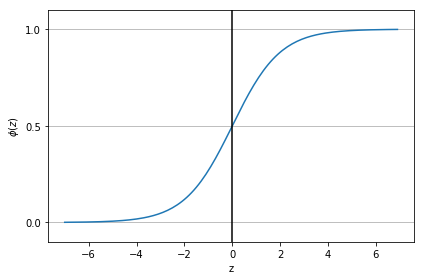

In [11]:
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1 +  np.exp(-z) )

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1,1.1)

plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 3.3.2  Plot Cost Function

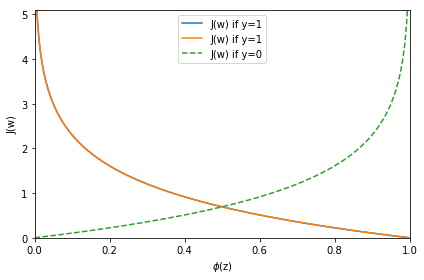

In [17]:
# Cost Funciton Calculator 
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

ｚ = np.arange(-10,10,.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])

plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

### 3.3 ADALINE

In [54]:
class LogisticRegressionGD(object):
    
    """
    
    PARAMETERS
    -------------
    eta : float
        Learning Ratio
    
    n_iter : int
        Iteration number
    random_state : int
        Random Seed for initializing weights
    
    ATTRIBUTES
    --------------
    w_ : 1dimension List
    
    cost_ : List
    
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        
        """
        
        PARAMETERS
        ---------------
        X : shape = [n_samples, n_features]
            Training data
        
        y : 
            Target Variable
        
        
        RETRUN
        ---------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale= 0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0 )         
            

In [55]:
# Iris Dataset Import 
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1, stratify=y)


Class labels: [0 1 2]


In [56]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

        


In [57]:
#########################
#    Above-mentioned at 3.2
#########################
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    
    # marker & color-map
    markers = ('s', 'x','o','^','v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap   = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1    
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
                           
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                   )
    
    if test_idx:
        
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set'
                   
                  )


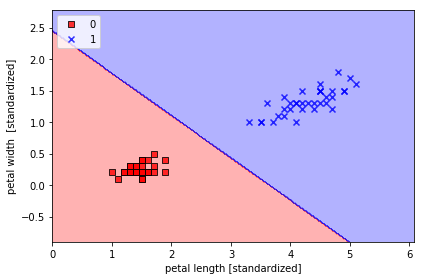

In [58]:
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd
                     )

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width  [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 3.3.4 Using scikit-learn

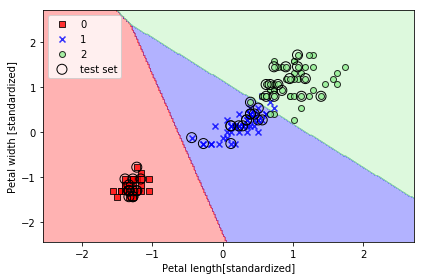

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105,150))

plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal width [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [67]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [68]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [70]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

In [72]:
### 3.35 Regularization

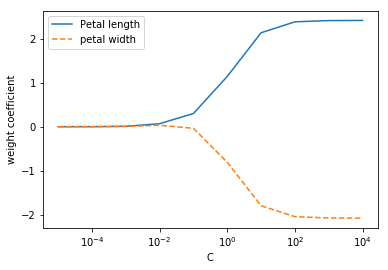

In [91]:
weights, params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()